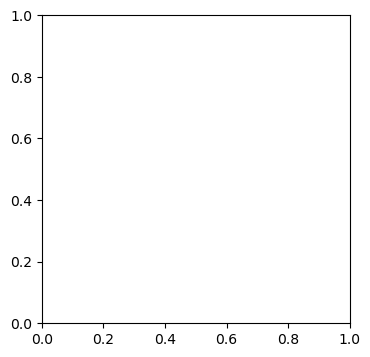

In [ ]:
import matplotlib.pyplot as plt
import os
import json


def read_all_lines_from_directory(directory):
    all_lines = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                all_lines.append(file.read())
    return "\n".join(all_lines)

def create_image(filename, context):
    # Prepare context
    context_parts = context.split('_')
    lines = [item for sublist in context_parts for item in sublist.split()]
    num_labels = len([x for x in lines if x.isdigit()])
    x_coordinates = [i if i.isdigit() else 0 for i in lines]
    y_coordinates = [0 if i == 'Train' else num_labels if i == 'Val' else None for i in lines]

    # Create a new figure
    plt.figure(figsize=(10, 4))
    plt.axes().set_aspect('equal')

    # Plot context elements
    for i, x in enumerate(x_coordinates):
        if y_coordinates[i] is not None:
            plt.text(x, y_coordinates[i], lines[i], ha='center', fontsize=20, fontweight='bold')
        else:
            plt.axvspan(x - 100, x + 100, ymin=0, ymax=num_labels, alpha=0.1)

    # Save and show the image
    plt.savefig(filename)
    plt.show()
    
    
def read_coco_annotations(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def create_train_valid_sets(data_directory):
    train_data_path = os.path.join(data_directory, "test/_annotations.coco.json")
    valid_data_path = os.path.join(data_directory, "valid/_annotations.coco.json")

    train_data = read_coco_annotations(train_data_path)
    valid_data = read_coco_annotations(valid_data_path)

    return train_data, valid_data

# Load data from the file
data_directory = "test/_annotations.coco.json"
data = read_all_lines_from_directory(data_directory)

# Create the image
create_image("review_image.png", data)
